In [1]:
import torch
import os
print(torch.cuda.is_available())
torch.cuda.empty_cache()
torch.cuda.mem_get_info()

True


(15720382464, 15828320256)

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/My Drive/data800/data800-gray')

In [4]:
!pwd

/content/drive/My Drive/data800/data800-gray


In [ ]:
# Define the path
path = '/content/drive/MyDrive/data800/data800'

# List all files and directories in the specified path
files = os.listdir(path)
for file in files:
    print(file)

classes.txt
data.yaml
yolov8n.pt
valid
train
test
data-gray.yaml


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [1]:
from ultralytics import YOLO

model = YOLO("/content/drive/My Drive/data800/data800/yolov8n.pt")  # load a pretrained model (recommended for training)
trainer = model.train(data="/content/drive/My Drive/data800/data800/data-gray.yaml", imgsz=800, epochs=300, device="cuda", lr0=0.007, optimizer='AdamW', weight_decay=0.000008)  # train the model


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/data800/data800/yolov8n.pt, data=/content/drive/My Drive/data800/data800/data-gray.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 5.35M/5.35M [00:00<00:00, 129MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/My Drive/data800/data800-gray/train/labels... 315 images, 214 backgrounds, 0 corrupt: 100%|██████████| 323/323 [00:58<00:00,  5.52it/s]


train: New cache created: /content/drive/My Drive/data800/data800-gray/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/data800/data800-gray/val/labels... 30 images, 19 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:19<00:00,  1.58it/s]

val: New cache created: /content/drive/My Drive/data800/data800-gray/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.007, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=8e-06), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      3.54G      2.203      14.54      1.257          2        800: 100%|██████████| 21/21 [00:12<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all         30         35          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      3.38G      2.383      2.239      1.273         11        800: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         30         35      0.238      0.286      0.323      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      3.41G      2.173       1.97      1.222          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         35   0.000161     0.0286   9.36e-05   9.36e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      3.31G      2.497       2.35      1.405          1        800: 100%|██████████| 21/21 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         30         35   0.000111     0.0286    5.8e-05   1.16e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      3.32G      2.335      1.969      1.305         19        800: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         30         35   0.000111     0.0286    5.8e-05   1.16e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      3.45G      2.325      2.086      1.323         23        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         30         35      0.002     0.0286    0.00109   0.000434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300       3.5G      2.447      2.375      1.298          5        800: 100%|██████████| 21/21 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         30         35      0.268      0.429      0.226      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      3.49G      2.293      2.062      1.248         12        800: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         30         35      0.341        0.4      0.359      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      3.28G       2.11      2.034      1.152          0        800: 100%|██████████| 21/21 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         30         35      0.283      0.286      0.238      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      3.49G      2.084      1.827       1.27          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         30         35      0.339      0.714      0.503      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      3.53G       2.11      1.842      1.249          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         30         35      0.347      0.244      0.291      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      3.49G      2.032       1.69      1.193          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         30         35      0.629      0.229      0.248      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      3.36G      2.201      1.831      1.234          9        800: 100%|██████████| 21/21 [00:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         30         35      0.311      0.114     0.0861     0.0361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      3.42G      2.088      1.808       1.24          6        800: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         30         35      0.667      0.457      0.568      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      3.49G      2.175      1.808      1.224         11        800: 100%|██████████| 21/21 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         35      0.499      0.571      0.502       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      3.66G      2.041      1.709      1.224         10        800: 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         30         35      0.709        0.4      0.547      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      3.44G      2.078      1.805      1.197          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         30         35      0.525      0.457      0.537      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      3.49G      1.936      1.593      1.086          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         30         35      0.628      0.343      0.446      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      3.61G      2.004        1.6      1.155          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         30         35      0.898      0.429      0.586      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      3.45G      1.973      1.569      1.187          6        800: 100%|██████████| 21/21 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         30         35      0.503      0.492      0.507      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      3.36G      1.945      1.775      1.134          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         30         35      0.544      0.257      0.341      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      3.44G      1.777      1.377      1.033          0        800: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         30         35     0.0889      0.114      0.063     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      3.45G      1.998      1.595      1.172          7        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         30         35      0.781      0.486      0.649      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300       3.5G      2.042      1.584      1.158         11        800: 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         30         35      0.699      0.429      0.429      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      3.34G      1.944      1.569      1.098          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         30         35      0.665      0.429      0.454       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      3.49G      1.874       1.56      1.155         15        800: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         30         35       0.67      0.371      0.398      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300       3.5G      1.836       1.48      1.074          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         30         35      0.538        0.2      0.332      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      3.49G      1.824      1.464      1.139          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         30         35      0.207      0.514      0.301      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      3.35G      1.933      1.751      1.079          2        800: 100%|██████████| 21/21 [00:08<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         30         35      0.526      0.714      0.646       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      3.41G      1.797      1.448      1.071          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         30         35      0.842      0.686      0.784      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      3.45G      1.817      1.381       1.13          9        800: 100%|██████████| 21/21 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         30         35      0.509      0.343      0.344      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      3.54G       1.94      1.411      1.121          5        800: 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         30         35      0.298      0.257      0.229      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      3.28G      1.881      1.381      1.155          6        800: 100%|██████████| 21/21 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         30         35      0.674        0.4      0.476      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      3.44G      1.861      1.433      1.088         11        800: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         30         35      0.125        0.2      0.145     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      3.42G      1.774       1.31      1.103         10        800: 100%|██████████| 21/21 [00:08<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         30         35      0.604      0.343      0.389       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      3.48G       1.83      1.335      1.071          4        800: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         30         35      0.458      0.387      0.411      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      3.28G      1.822      1.386      1.123         55        800: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         30         35      0.614      0.592      0.617      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      3.49G      1.761      1.272      1.064         18        800: 100%|██████████| 21/21 [00:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         30         35      0.735      0.429      0.536      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      3.46G      1.804      1.329      1.137          7        800: 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         30         35      0.518      0.457      0.438      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      3.46G      1.776      1.329      1.078          6        800: 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         30         35      0.571      0.684      0.627      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      3.32G      1.781      1.356      1.143          8        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         30         35       0.85      0.647      0.781      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      3.42G      1.859      1.424      1.099          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         30         35      0.793      0.655      0.715      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300       3.5G      1.767      1.279       1.08          6        800: 100%|██████████| 21/21 [00:08<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         30         35      0.792      0.371      0.525      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      3.49G      1.743      1.289      1.044          9        800: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         30         35      0.748      0.486      0.527      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300       3.3G      1.744      1.341       1.12         12        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         30         35      0.552        0.6      0.589      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      3.49G       1.74      1.265      1.055         44        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         30         35      0.472      0.743      0.567      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      3.45G      1.841       1.29      1.124          7        800: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         30         35      0.856      0.686      0.774      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300       3.5G      1.684      1.254      1.064          7        800: 100%|██████████| 21/21 [00:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         30         35      0.621      0.686       0.71      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      3.32G      1.828      1.362      1.046          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         30         35      0.459      0.571      0.519      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      3.57G      1.781      1.445      1.091         10        800: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         30         35       0.93        0.4       0.55      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      3.45G      1.777      1.352      1.064          3        800: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         30         35      0.647      0.686       0.72       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300       3.5G      1.637       1.25      1.043          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         30         35      0.631      0.657      0.663      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      3.32G      1.635       1.16      1.032          3        800: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         30         35      0.697      0.629      0.699      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      3.68G      1.717      1.337      1.049          9        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         30         35      0.696      0.514      0.563      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      3.49G      1.609      1.197     0.9882          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         30         35       0.66      0.629      0.678      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      3.49G      1.893      1.305      1.015          3        800: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         30         35      0.825      0.629      0.716       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      3.28G      1.869      1.278      1.118          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         30         35      0.878      0.629      0.712      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      3.52G      1.713      1.294       1.04          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         30         35      0.787        0.6      0.708      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      3.41G      1.759      1.321      1.018          1        800: 100%|██████████| 21/21 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         35      0.758      0.543      0.624      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      3.53G      1.614      1.098      1.034          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         30         35      0.898      0.486      0.652      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      3.35G      1.605      1.129      1.036         11        800: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         30         35      0.893      0.571      0.722      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      3.32G        1.8      1.252      1.088          5        800: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         30         35      0.397      0.429      0.356      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      3.62G      1.613      1.118      1.034         15        800: 100%|██████████| 21/21 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         30         35      0.856       0.51      0.625      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      3.42G      1.671      1.196      1.026          4        800: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         30         35      0.907      0.657      0.723       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      3.32G       1.72      1.241       1.03          6        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         30         35      0.909      0.486      0.589      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      3.49G      1.508      1.119     0.9688          0        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         30         35      0.829      0.486      0.574      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      3.42G       1.58      1.116      1.032          5        800: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         30         35       0.95      0.657      0.809       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300       3.5G      1.685      1.205      1.026          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         30         35      0.604      0.436      0.473      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      3.31G      1.643       1.17      1.076          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         30         35          1      0.341       0.54      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300       3.6G      1.645      1.171      1.006          1        800: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         30         35      0.535      0.314      0.295      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      3.44G      1.631      1.132      1.027          9        800: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         30         35      0.396      0.371      0.366      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      3.41G      1.696      1.156      1.042         12        800: 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         30         35      0.699      0.657        0.7      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      3.31G      1.693      1.163       1.04          6        800: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         30         35      0.731        0.4      0.432        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      3.44G      1.584      1.138     0.9521          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         30         35       0.77      0.429      0.517      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      3.45G      1.585      1.087       1.01          4        800: 100%|██████████| 21/21 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         30         35      0.857      0.685      0.748       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      3.46G      1.586      1.079      1.071          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         30         35      0.439      0.457      0.412      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      3.32G      1.538      1.099      1.013         18        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         30         35      0.378      0.286      0.291      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      3.44G      1.611      1.073      1.025         25        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         30         35      0.764      0.571      0.635      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      3.46G      1.734      1.178       1.05          5        800: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         30         35      0.891        0.6      0.738      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      3.41G      1.591      1.118      1.019          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         30         35      0.752      0.629      0.658      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      3.34G      1.618      1.078      1.034         15        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         30         35      0.745      0.571       0.64      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300       3.4G       1.53      1.025      1.019          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         30         35        0.6      0.571      0.608      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      3.48G      1.601      1.088      1.005         13        800: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         30         35      0.761      0.544      0.654      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      3.53G      1.672      1.139     0.9934         13        800: 100%|██████████| 21/21 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         30         35      0.941      0.543      0.648       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      3.31G       1.53      1.045       1.01          8        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         30         35          1      0.571      0.669      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      3.29G      1.579      1.034      1.024          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         30         35          1      0.457      0.633      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      3.51G       1.55       1.03      1.013         20        800: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         30         35       0.71      0.698      0.722      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300       3.5G      1.486     0.9738     0.9766         18        800: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         30         35      0.557      0.257      0.345       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      3.36G      1.608      1.087      1.019          5        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         30         35      0.749      0.286      0.377      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300       3.5G      1.457     0.9479     0.9737          3        800: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         30         35       0.75        0.4      0.506      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      3.63G      1.483      1.016      1.047          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         30         35      0.768      0.571      0.616      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      3.44G      1.515      1.012      1.001          3        800: 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         30         35      0.683      0.676      0.697      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300       3.4G      1.529      1.046     0.9751         16        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         30         35      0.726      0.629      0.653      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      3.55G      1.471      1.001      0.931          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         30         35      0.711      0.571      0.606      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      3.52G      1.461     0.9775     0.9457          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         30         35      0.787      0.423      0.557      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      3.54G      1.624      1.025      1.027          8        800: 100%|██████████| 21/21 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         30         35      0.657        0.6      0.606      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      3.35G      1.537      1.131      1.002          5        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         30         35      0.886        0.6      0.684      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      3.31G      1.689      1.107      1.065          2        800: 100%|██████████| 21/21 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         30         35      0.519      0.457      0.512      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      3.46G      1.472     0.9461     0.9387          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         30         35      0.727      0.314      0.406      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      3.25G      1.492     0.9699     0.9949          2        800: 100%|██████████| 21/21 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         30         35      0.642       0.41      0.514      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      3.28G      1.549     0.9739     0.9648          8        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         30         35      0.732      0.779      0.801      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      3.36G      1.468     0.9873     0.9985          9        800: 100%|██████████| 21/21 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         30         35      0.671      0.571      0.599      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      3.45G      1.519     0.9587      1.015          7        800: 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         30         35       0.59      0.571      0.575       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      3.37G       1.48     0.9145     0.9884         12        800: 100%|██████████| 21/21 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         30         35      0.668      0.543      0.618      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      3.35G       1.44     0.9382      0.926          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         30         35      0.492      0.657      0.615      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      3.38G       1.46     0.9183      1.019         10        800: 100%|██████████| 21/21 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         30         35      0.892      0.629      0.699      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      3.38G      1.496     0.9778      1.015          3        800: 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         30         35      0.873      0.591      0.692       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      3.34G      1.465     0.9771     0.9762         13        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         30         35      0.745      0.657      0.658      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      3.47G      1.401     0.8877     0.9153          0        800: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         30         35      0.459      0.486      0.462      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      3.37G      1.574     0.9673     0.9566          1        800: 100%|██████████| 21/21 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         30         35      0.574      0.629       0.66      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300       3.3G      1.512     0.9738     0.9978          5        800: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         30         35      0.502      0.571      0.532      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      3.29G      1.546     0.9752     0.9997         29        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         30         35      0.687        0.6       0.64      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      3.46G      1.614      1.018     0.9738          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         30         35      0.667        0.6       0.61      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      3.47G      1.505      0.922     0.9856         23        800: 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         30         35      0.643      0.514      0.557       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300       3.3G      1.487     0.9217     0.9702          5        800: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         30         35      0.921        0.6      0.752      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      3.29G      1.543     0.9347     0.9639          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         30         35       0.82      0.657      0.779      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      3.28G      1.496     0.8703     0.9607          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         30         35      0.724      0.629      0.682      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      3.33G      1.465     0.9106     0.9712         13        800: 100%|██████████| 21/21 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         30         35      0.748      0.592      0.674      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      3.32G      1.346     0.8287     0.9484          5        800: 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         30         35      0.839      0.714      0.821      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300       3.3G      1.418     0.8662     0.9536          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         30         35      0.853      0.661      0.795      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      3.28G      1.449     0.8853     0.9734          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         30         35      0.592      0.714       0.67      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      3.38G      1.421     0.9208     0.9877          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         30         35      0.832      0.514      0.641      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      3.36G      1.469     0.9425     0.9846         16        800: 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         30         35      0.782      0.616      0.673      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      3.37G      1.462     0.9097     0.9555          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         30         35      0.799      0.571      0.658       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      3.31G      1.453     0.9104     0.9601          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         30         35       0.74      0.514      0.554      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      3.29G      1.502      0.895      1.002          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         30         35      0.857        0.6      0.659      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      3.38G      1.493     0.9676     0.9821         10        800: 100%|██████████| 21/21 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         30         35      0.551      0.571      0.518      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      3.32G      1.457     0.9186     0.9765          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         30         35      0.762      0.543      0.639       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      3.37G      1.515     0.9246     0.9846          4        800: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         30         35       0.76        0.6      0.699      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300       3.3G      1.485     0.8751     0.9944          4        800: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         30         35      0.739      0.514      0.554      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      3.36G      1.422     0.9006     0.9411         30        800: 100%|██████████| 21/21 [00:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         30         35      0.747      0.507       0.59      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      3.42G      1.481     0.8847      0.983          8        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         30         35      0.907        0.6      0.727      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      3.32G      1.403      0.878      0.949          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         30         35      0.774      0.687      0.719      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      3.32G      1.439     0.8652     0.9822          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         30         35      0.784      0.622      0.709      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      3.42G      1.425     0.8734     0.9537          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         30         35      0.747      0.675      0.693      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      3.29G      1.385     0.8157     0.9351          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         30         35      0.872      0.582      0.722      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      3.31G      1.397     0.9076     0.9753          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         30         35      0.626      0.686      0.677      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      3.36G      1.507     0.9555     0.9627          3        800: 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         30         35      0.697      0.514      0.584      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      3.33G      1.382     0.8828     0.9261          6        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         30         35      0.772      0.429      0.556      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      3.36G      1.508     0.8471     0.9716          2        800: 100%|██████████| 21/21 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         30         35      0.808      0.457      0.617      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      3.58G      1.482      1.001     0.9036          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         30         35      0.697      0.656      0.643      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      3.29G      1.358     0.8575     0.9822         17        800: 100%|██████████| 21/21 [00:08<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         30         35      0.721      0.571      0.625      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      3.41G      1.432     0.9365     0.9728          4        800: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         30         35      0.903      0.535      0.692      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      3.37G       1.46      0.971     0.9619          1        800: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         30         35      0.848      0.514      0.664      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      3.28G      1.415     0.8541     0.9792         10        800: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         30         35      0.695      0.455      0.517       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      3.29G       1.38     0.8302     0.9664         18        800: 100%|██████████| 21/21 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         30         35      0.645      0.371      0.441      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      3.32G      1.398     0.8727     0.9552         32        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         30         35      0.667      0.514      0.596      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      3.42G       1.53     0.9811      1.015          1        800: 100%|██████████| 21/21 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         30         35      0.957      0.629      0.792      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      3.31G      1.615     0.9293     0.9919         10        800: 100%|██████████| 21/21 [00:07<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         30         35      0.815      0.502      0.598      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      3.31G      1.705       1.16      1.044          4        800: 100%|██████████| 21/21 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         30         35      0.772      0.571      0.631       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      3.29G      1.466      0.901     0.9463          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         30         35      0.813      0.497       0.61      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      3.33G      1.332     0.8703     0.9271          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         30         35      0.953        0.6      0.741      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      3.28G      1.432     0.8853     0.9427          1        800: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         30         35      0.827      0.547      0.595      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      3.33G      1.404     0.8393     0.9962          2        800: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         30         35      0.548      0.514      0.541      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      3.33G      1.292     0.8168     0.9056          0        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         30         35      0.789      0.514      0.644      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      3.29G       1.39     0.8516      0.956         50        800: 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         30         35      0.442        0.4      0.387      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      3.35G      1.406     0.8921     0.9569          9        800: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         30         35      0.571      0.286      0.292      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      3.33G      1.451     0.8427     0.9965         14        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         30         35      0.658      0.371      0.476      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      3.32G       1.37     0.8028     0.9388         17        800: 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         30         35      0.635      0.449      0.484      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      3.33G      1.469     0.9197     0.9895         20        800: 100%|██████████| 21/21 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         30         35      0.527      0.447      0.452      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      3.34G      1.321     0.7665     0.9572         19        800: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         30         35      0.752      0.629      0.721      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      3.32G      1.377     0.7689     0.9612          6        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         30         35      0.638      0.514      0.568       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      3.42G      1.405     0.8218     0.9773          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         30         35      0.581      0.429      0.525      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      3.36G       1.43     0.8871     0.9435          2        800: 100%|██████████| 21/21 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         30         35      0.506        0.6      0.588        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      3.37G      1.411     0.8707     0.9252          3        800: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         30         35      0.753      0.429      0.518      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      3.37G      1.369     0.7775     0.9795          3        800: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         30         35      0.605      0.714      0.638      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      3.51G      1.414     0.8494     0.9692          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         30         35      0.923      0.429      0.634      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      3.43G      1.591      1.033     0.9933         14        800: 100%|██████████| 21/21 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         30         35      0.882      0.429      0.552      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      3.36G      1.381     0.9355     0.9541          5        800: 100%|██████████| 21/21 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         30         35      0.693      0.429       0.51      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      3.36G      1.449     0.9743     0.9692          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         30         35      0.855      0.657      0.756      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      3.32G      1.375     0.9016     0.9455          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         30         35      0.904      0.629      0.751      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      3.32G      1.409     0.8633     0.9585         22        800: 100%|██████████| 21/21 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         30         35      0.648        0.6        0.6      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      3.32G      1.288     0.7813     0.9466          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         30         35      0.712      0.637      0.647      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      3.33G      1.404     0.8212     0.9669         12        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         30         35      0.852        0.4      0.534       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      3.33G       1.39     0.8716     0.9553          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         30         35      0.771      0.371      0.487       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      3.33G       1.37     0.8394     0.9385          4        800: 100%|██████████| 21/21 [00:08<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         35      0.472      0.332      0.339      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      3.31G       1.33     0.7959     0.9571          4        800: 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         30         35      0.338      0.429      0.355      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      3.32G      1.267      0.748     0.9075          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         30         35      0.403        0.6      0.495      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      3.32G      1.369     0.8357      0.973          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         30         35      0.845      0.686      0.752      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      3.33G      1.357     0.7686     0.9647         18        800: 100%|██████████| 21/21 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         30         35       0.65      0.486      0.579       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      3.34G      1.217     0.7269     0.8961          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         30         35      0.643      0.543      0.571       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      3.39G      1.279     0.7557     0.9147         12        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         30         35      0.633      0.543       0.58      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      3.32G      1.327     0.7561     0.9258         42        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         30         35       0.62      0.543      0.597      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      3.29G       1.29     0.7847     0.9052          0        800: 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         30         35      0.646      0.514      0.522      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      3.31G      1.447     0.9101     0.9284         18        800: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         30         35      0.575      0.429      0.433      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      3.33G       1.33     0.8045     0.9461          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         30         35      0.531      0.356      0.379      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      3.29G      1.382     0.8054     0.9362          8        800: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         30         35      0.483        0.6      0.551      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      3.29G      1.285     0.7514     0.9326          3        800: 100%|██████████| 21/21 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         30         35      0.539      0.534      0.517      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300       3.3G      1.346      0.786     0.9478         20        800: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         30         35      0.887      0.448      0.598      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      3.37G      1.324     0.7701     0.9157          7        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         30         35      0.491        0.6      0.531      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      3.33G       1.33     0.7647     0.9413          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         30         35      0.503      0.514      0.501      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      3.37G      1.288     0.7555     0.9328          3        800: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         30         35      0.785      0.418      0.535      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      3.28G      1.327      0.831      0.921          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         30         35      0.542      0.457      0.473      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      3.55G      1.443     0.8121      0.922          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         30         35      0.534      0.514      0.498      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      3.42G      1.247     0.7651     0.9354          2        800: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         30         35      0.775      0.486      0.592      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      3.29G       1.27     0.6939     0.9159         16        800: 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         30         35      0.571      0.456      0.479       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      3.37G      1.291      0.757     0.9335         21        800: 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         30         35      0.609      0.514      0.589      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      3.33G      1.305     0.7808     0.9316         40        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         30         35      0.568      0.514       0.54      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      3.41G      1.221     0.6828     0.9219          9        800: 100%|██████████| 21/21 [00:08<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         30         35      0.606      0.629      0.643       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      3.41G      1.417     0.7838     0.9374          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         30         35      0.727      0.543      0.593      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      3.31G      1.345     0.8153      0.962          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         30         35      0.852      0.657      0.735       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      3.39G      1.391     0.8179     0.9787          6        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         30         35      0.743      0.571      0.698      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      3.41G      1.398      1.096     0.9433          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         30         35      0.528       0.48        0.5      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      3.32G      1.316     0.7656     0.9336          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         30         35      0.826      0.286      0.389      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      3.42G      1.194     0.7206     0.9006          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         30         35      0.965      0.343      0.498      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      3.36G      1.222     0.7545     0.8726          0        800: 100%|██████████| 21/21 [00:09<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         30         35      0.724      0.486      0.597      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      3.38G      1.368     0.7876     0.9518          7        800: 100%|██████████| 21/21 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         30         35      0.711      0.486      0.581      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      3.33G      1.216       0.75     0.9318          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         30         35      0.563      0.514      0.575      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      3.28G      1.293     0.7355     0.9276         13        800: 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         30         35        0.9      0.457      0.639      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      3.45G      1.302     0.8453     0.9233          6        800: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         30         35      0.864        0.4      0.564       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      3.33G      1.289     0.7369     0.9087         21        800: 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         30         35      0.687      0.571      0.597      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      3.37G      1.262     0.7258     0.9282          9        800: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         30         35      0.558      0.629      0.618      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      3.28G      1.172      0.715     0.9153          1        800: 100%|██████████| 21/21 [00:07<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         30         35      0.503      0.514      0.486      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      3.29G      1.288     0.7396     0.9252         21        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         30         35      0.723      0.543      0.635      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      3.34G      1.298     0.7061     0.9264          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         30         35      0.565      0.657      0.659      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      3.32G      1.154     0.7371     0.8828          0        800: 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         30         35       0.95      0.543      0.746       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      3.31G      1.323     0.7451     0.9491          5        800: 100%|██████████| 21/21 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         30         35       0.92        0.4      0.602      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      3.33G      1.332       1.03     0.9613          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         30         35      0.519      0.571       0.55      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      3.33G      1.227     0.6927     0.9241          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         30         35      0.593      0.542      0.535      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      3.33G      1.215     0.7419      0.938          2        800: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         30         35       0.87      0.429      0.586      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      3.34G      1.283     0.7491      0.957          4        800: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         30         35        0.6        0.4      0.477      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      3.38G      1.284     0.7287     0.9444          2        800: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         30         35      0.598      0.571      0.529      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      3.39G      1.299     0.7571     0.9155         12        800: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         30         35      0.707      0.689      0.717      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      3.41G      1.216      0.706     0.9292         11        800: 100%|██████████| 21/21 [00:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         30         35      0.829      0.693      0.799      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      3.34G       1.27     0.7109     0.9259         18        800: 100%|██████████| 21/21 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         30         35      0.709      0.714      0.745      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      3.37G      1.245     0.7807     0.9165          6        800: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         30         35      0.744      0.629      0.685      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      3.32G      1.265     0.7387     0.9253          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         30         35      0.866      0.554      0.669      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300       3.4G       1.29      0.728     0.9111          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         30         35      0.769        0.6      0.676      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      3.31G      1.269     0.7341      0.938          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         30         35      0.683      0.617       0.65      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      3.43G      1.247     0.7135     0.9326          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         30         35      0.699      0.686      0.721      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      3.34G      1.281     0.7426     0.9176          5        800: 100%|██████████| 21/21 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         30         35      0.807      0.599      0.728      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      3.47G       1.16     0.6654     0.9052          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         30         35      0.786      0.714      0.787      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      3.28G      1.245     0.6983     0.9214         12        800: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         30         35      0.594        0.6      0.639      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      3.36G        1.2     0.6486     0.9194          3        800: 100%|██████████| 21/21 [00:09<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         30         35      0.632      0.639       0.66       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      3.33G      1.212     0.6927     0.9109          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         30         35      0.762      0.549       0.65      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      3.47G      1.334     0.7078     0.9594          7        800: 100%|██████████| 21/21 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         30         35      0.948      0.543      0.697      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300       3.3G      1.231     0.6841     0.9576         12        800: 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         30         35      0.881      0.514      0.655      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      3.33G      1.176     0.7087     0.9054          9        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         30         35      0.898      0.457      0.601      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      3.44G      1.272     0.7467      0.949          8        800: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         30         35       0.88      0.457       0.63      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      3.32G      1.197     0.6811     0.9212          1        800: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         30         35      0.682      0.797      0.743      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      3.48G      1.292     0.7913     0.9182          8        800: 100%|██████████| 21/21 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         30         35      0.594      0.771      0.704      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      3.32G      1.296     0.7747     0.9303          4        800: 100%|██████████| 21/21 [00:09<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         30         35      0.583      0.657      0.652      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      3.32G      1.275     0.8048     0.8943          2        800: 100%|██████████| 21/21 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         30         35      0.661      0.447       0.53      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      3.33G      1.264     0.7131      0.921          7        800: 100%|██████████| 21/21 [00:08<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         30         35      0.627      0.486      0.579      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      3.39G      1.278     0.7635     0.9693          1        800: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         30         35      0.593      0.429      0.528      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      3.33G      1.274      0.785     0.9217          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         30         35      0.691      0.486       0.58      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      3.37G      1.184     0.6984     0.8867          1        800: 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         30         35      0.574      0.771      0.678      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      3.33G      1.195     0.6799     0.9069          4        800: 100%|██████████| 21/21 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         30         35      0.872      0.486      0.639      0.409
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 148, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



248 epochs completed in 0.730 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


                   all         30         35      0.954      0.629      0.793      0.556
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [ ]:
os.listdir()

['.config', 'yolo11n.pt', 'runs', 'drive', 'sample_data']

In [2]:
metrics = model.val()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/data800/data800-gray/val/labels.cache... 30 images, 19 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


                   all         30         35      0.954      0.629      0.789      0.556
Speed: 7.6ms preprocess, 11.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


In [3]:
results = model("/content/drive/My Drive/data800/data800-gray/val/images/blindtest_0_0_grayscale.jpg")  # predict on an image
path = model.export(format="onnx", imgsz=800, opset=17)  # export the model to ONNX format


image 1/1 /content/drive/My Drive/data800/data800-gray/val/images/blindtest_0_0_grayscale.jpg: 800x800 6 ships, 10.6ms
Speed: 6.9ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 800)
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 5, 13125) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 265.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 336.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 201.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 197.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 302.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅

In [5]:
path = model.export(format="onnx", imgsz=800, opset=17)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 5, 13125) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 17...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.6s, saved as 'runs/detect/train/weights/best.onnx' (11.8 MB)

Export complete (2.2s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=800  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=800 data=/content/drive/My Drive/data800/data800/data-gray.yaml  
Visualize:       https://netron.app


In [6]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a pretrained model (recommended for training)
results = model("/content/drive/My Drive/data800/data800-gray/test/images/validation_0_6_grayscale.jpg")  # predict on an image


image 1/1 /content/drive/My Drive/data800/data800-gray/test/images/validation_0_6_grayscale.jpg: 800x800 14 ships, 10.2ms
Speed: 4.3ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)


In [7]:
import os
os.listdir('/content/drive/My Drive/data800/data800-gray/test/images')

['validation_0_4_grayscale.jpg',
 'validation_1_4_grayscale.jpg',
 'validation_1_3_grayscale.jpg',
 'validation_2_4_grayscale.jpg',
 'validation_2_1_grayscale.jpg',
 'validation_0_7_grayscale.jpg',
 'validation_3_7_grayscale.jpg',
 'validation_1_2_grayscale.jpg',
 'validation_4_2_grayscale.jpg',
 'validation_4_4_grayscale.jpg',
 'validation_3_1_grayscale.jpg',
 'validation_2_6_grayscale.jpg',
 'validation_4_0_grayscale.jpg',
 'validation_2_0_grayscale.jpg',
 'validation_0_5_grayscale.jpg',
 'validation_3_5_grayscale.jpg',
 'validation_1_7_grayscale.jpg',
 'validation_3_0_grayscale.jpg',
 'validation_1_6_grayscale.jpg',
 'validation_3_4_grayscale.jpg',
 'validation_0_6_grayscale.jpg',
 'validation_3_6_grayscale.jpg',
 'validation_2_2_grayscale.jpg',
 'validation_1_5_grayscale.jpg',
 'validation_3_3_grayscale.jpg',
 'validation_3_2_grayscale.jpg',
 'validation_5_0_grayscale.jpg',
 'validation_4_1_grayscale.jpg',
 'validation_2_3_grayscale.jpg',
 'validation_4_3_grayscale.jpg',
 'validati

In [8]:
import os

for image in os.listdir('/content/drive/My Drive/data800/data800-gray/test/images'):
    results = model(f"/content/drive/My Drive/data800/data800-gray/test/images/{image}")  # predict on an image
    results[0].plot(save=True, filename=f'./testing/{image}', label_path=f'/content/drive/My Drive/data800/data800-gray/test/labels/{image.replace(".jpg", ".txt")}')  # plot predictions
    results[0].save(f'./content/drive/My Drive/data800')


image 1/1 /content/drive/My Drive/data800/data800-gray/test/images/validation_0_4_grayscale.jpg: 800x800 (no detections), 10.4ms
Speed: 3.6ms preprocess, 10.4ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 800)


TypeError: Results.plot() got an unexpected keyword argument 'label_path'

In [10]:
import os

for image in os.listdir('/content/drive/My Drive/data800/data800-gray/test/images'):
    results = model(f"/content/drive/My Drive/data800/data800-gray/test/images/{image}")  # predict on an image

    # Instead of label_path, try names for providing labels
    # Check the documentation for correct usage.
    results[0].plot(save=True, filename=f'/content/drive/My Drive/data800/data800-gray/{image}', labels=results[0].names)  # plot predictions

    results[0].save(f'./content/drive/My Drive/data800/{image}')


image 1/1 /content/drive/My Drive/data800/data800-gray/test/images/validation_0_4_grayscale.jpg: 800x800 (no detections), 10.2ms
Speed: 4.7ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)

image 1/1 /content/drive/My Drive/data800/data800-gray/test/images/validation_1_4_grayscale.jpg: 800x800 (no detections), 10.1ms
Speed: 3.5ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)

image 1/1 /content/drive/My Drive/data800/data800-gray/test/images/validation_1_3_grayscale.jpg: 800x800 (no detections), 10.1ms
Speed: 2.7ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 800, 800)

image 1/1 /content/drive/My Drive/data800/data800-gray/test/images/validation_2_4_grayscale.jpg: 800x800 1 ship, 10.1ms
Speed: 5.8ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)

image 1/1 /content/drive/My Drive/data800/data800-gray/test/images/validation_2_1_grayscale.jpg: 800

In [ ]:
path = model.export(format="onnx", imgsz=800, opset=17)

Ultralytics YOLOv8.2.77  Python-3.8.19 torch-2.4.0 CPU (13th Gen Intel Core(TM) i7-13700H)

PyTorch: starting from 'runs\detect\train23\weights\best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 5, 13125) (6.0 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success  0.5s, saved as 'runs\detect\train23\weights\best.onnx' (11.8 MB)

Export complete (2.1s)
Results saved to C:\Users\Monko\Documents\galassia\gi_training\runs\detect\train23\weights
Predict:         yolo predict task=detect model=runs\detect\train23\weights\best.onnx imgsz=800  
Validate:        yolo val task=detect model=runs\detect\train23\weights\best.onnx imgsz=800 data=./data800/data.yaml  
Visualize:       https://netron.app


In [12]:
results = model("/content/drive/My Drive/data800/data800-gray/test/images/validation_1_6_grayscale.jpg")  # predict on an image


image 1/1 /content/drive/My Drive/data800/data800-gray/test/images/validation_1_6_grayscale.jpg: 800x800 22 ships, 19.2ms
Speed: 4.3ms preprocess, 19.2ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)


In [13]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.8741, 0.8007, 0.7894, 0.7745, 0.7558, 0.7523, 0.7410, 0.7330, 0.7264, 0.7209, 0.7134, 0.7064, 0.6795, 0.6635, 0.6166, 0.6019, 0.5774, 0.5764, 0.3409, 0.3239, 0.3168, 0.2991], device='cuda:0')
data: tensor([[4.1107e+02, 3.6693e+02, 4.6367e+02, 4.2775e+02, 8.7408e-01, 0.0000e+00],
        [6.6430e+02, 5.2784e+02, 6.9249e+02, 5.8425e+02, 8.0071e-01, 0.0000e+00],
        [6.6197e+02, 9.2119e+01, 7.0225e+02, 1.1710e+02, 7.8938e-01, 0.0000e+00],
        [4.1660e+02, 6.4276e+01, 4.3938e+02, 1.0276e+02, 7.7452e-01, 0.0000e+00],
        [2.9439e+02, 2.2878e+02, 3.0800e+02, 2.8105e+02, 7.5576e-01, 0.0000e+00],
        [1.8406e+02, 1.5271e+02, 2.0421e+02, 1.9114e+02, 7.5231e-01, 0.0000e+00],
        [3.1056e+02, 1.1012e+02, 3.4880e+02, 1.3579e+02, 7.4103e-01, 0.0000e+00],
        [6.6802e+02, 2.9564e+02, 7.

In [14]:
results[0].plot(save=True, filename="testing.jpg", label_path="/content/drive/My Drive/data800/data800-gray/test/labels/validation_1_6_grayscale.txt")  # plot predictions

TypeError: Results.plot() got an unexpected keyword argument 'label_path'

array([[[94, 94, 94],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[94, 94, 94],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[94, 94, 94],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [91, 91, 91]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [91, 91, 91]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [91, 91, 91]]], dtype=uint8)
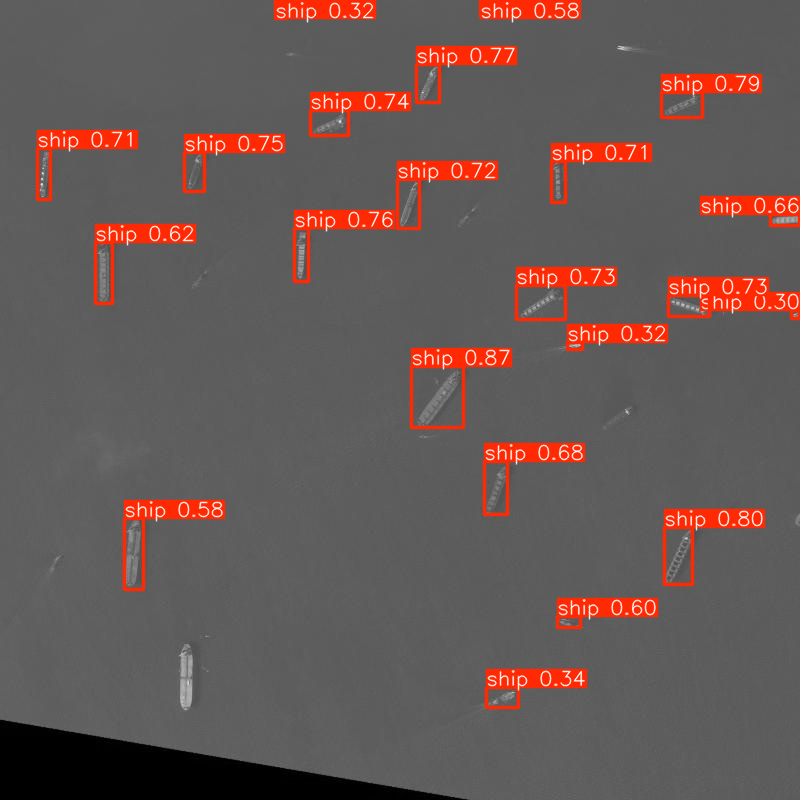

In [15]:
results[0].plot(save=True, filename="testing.jpg", labels=results[0].names)  # Use 'labels' instead of 'label_path'

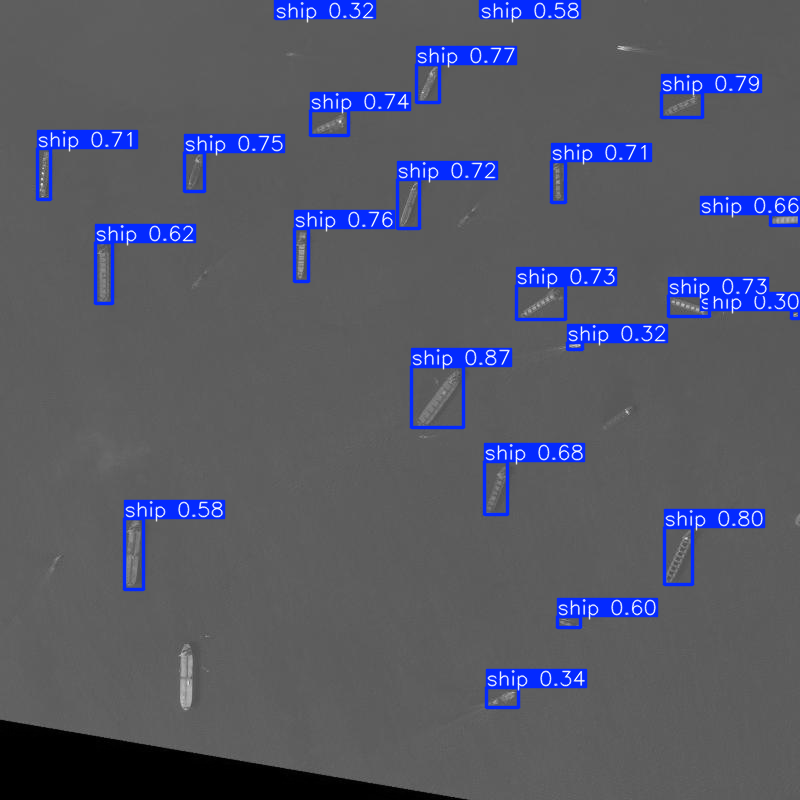

'./output1.jpg'

In [16]:
results[0].show()
results[0].save('./output1.jpg')

In [ ]:
results[0].save_crop(save_dir="./crops", file_name="detection")

In [ ]:
import onnx

# Load the model
model = onnx.load("./runs/detect/train25/weights/best.onnx")

# Check that the IR is well formed
onnx.checker.check_model(model)
